<a href="https://colab.research.google.com/github/LookUpJosh/DeepLearningPytorch/blob/main/simple_neuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# create a model class that inherits nn.Module
class Model(nn.Module):
  # input layer (4 features of the flower) -->
  # Hidden layer1(number of neurons) --> H2 (n) -->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1 = 8, h2 = 9, out_features = 3):
    super().__init__()  # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)  # fc = fully connected
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [ ]:
# pick random seed for randomization
torch.manual_seed(41)
# create an instance of model
model = Model()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [ ]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# change last  column from string to ints
my_df['species'] = my_df['species'].replace('setosa',0.0)
my_df['species'] = my_df['species'].replace('versicolor',1.0)
my_df['species'] = my_df['species'].replace('virginica',2.0)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
# train test and split! set X, y
X = my_df.drop('species', axis = 1)
y = my_df['species']

In [ ]:
# convert these to numpy arrays
X = X.values
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [ ]:
# now we need to convert these arrays to tensors
# long is 64 bit tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
# set the criterion of our model to measure the error, how far off the
# predictions are from the true values
criterion = nn.CrossEntropyLoss()
# choose Adam optimizer, lr = learning rate(if error doesnt go down with a bunch
# of iterations we may need to lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
# epoch is sending data all the way through the layers once and we will
# optomize every time we go through to try and get the model to learn



In [ ]:
# train our model!
# epochs? (one run through training data in our net)
epochs = 100
losses = []
for i in range(epochs):
  # go forward and get a prediction
  y_pred = model.forward(X_train)  # get predicted results

  # measure the loss or error, which will be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # keep track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')


  # do some back prop: take the error rate of forward prop and feed it back
  # thru the net to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.0096259117126465
Epoch: 20 and loss: 0.8157405853271484
Epoch: 30 and loss: 0.585706353187561
Epoch: 40 and loss: 0.3999636471271515
Epoch: 50 and loss: 0.26768800616264343
Epoch: 60 and loss: 0.17942361533641815
Epoch: 70 and loss: 0.12151690572500229
Epoch: 80 and loss: 0.0860118493437767
Epoch: 90 and loss: 0.06520850956439972


Text(0.5, 0, 'Epochs')

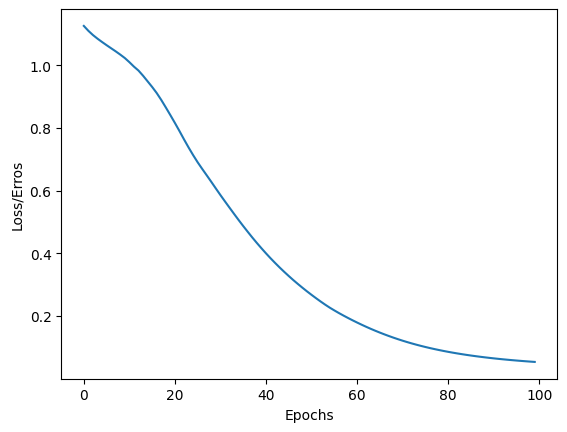

In [ ]:
# graph it out:
plt.plot(range(epochs), losses)
plt.ylabel('Loss/Erros')
plt.xlabel('Epochs')

In [ ]:
# evaluate model on test data
with torch.no_grad():
  y_eval = model.forward(X_test)  # X_test are features from our test set, y_evel
  # will be predictions
  loss = criterion(y_eval, y_test)

In [ ]:
loss

tensor(0.1315)

In [ ]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # if y_test[i] == 0:
    #   x = 'setosa'
    # elif y_test[i] == 1:
    #   x = 'versicolor'
    # else:
    #   x = 'virginica'


    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')
  # correct or not?
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.)  tensor([-5.8760,  4.4628,  6.5124]) 	 2 	 2
2.)  tensor([-7.5436,  4.1670,  9.7255]) 	 2 	 2
3.)  tensor([-8.4504,  5.1271, 10.1987]) 	 2 	 2
4.)  tensor([-4.3398,  5.6267,  2.5608]) 	 1 	 1
5.)  tensor([-7.1825,  4.8754,  8.2992]) 	 2 	 2
6.)  tensor([-3.3974,  5.3463,  1.2803]) 	 1 	 1
7.)  tensor([-5.9231,  4.9822,  5.9997]) 	 2 	 2
8.)  tensor([-4.2881,  5.7003,  2.3889]) 	 1 	 1
9.)  tensor([-6.5356,  4.9257,  7.1260]) 	 2 	 2
10.)  tensor([-8.0509,  4.4129, 10.3286]) 	 2 	 2
11.)  tensor([-5.6762,  4.9500,  5.6215]) 	 2 	 2
12.)  tensor([ 4.5662, -2.2476, -2.8911]) 	 0 	 0
13.)  tensor([ 4.2571, -1.9967, -2.7330]) 	 0 	 0
14.)  tensor([-2.1108,  4.0515,  0.5799]) 	 1 	 1
15.)  tensor([ 3.4575, -1.2098, -2.3514]) 	 0 	 0
16.)  tensor([-5.4724,  5.1165,  5.0934]) 	 2 	 1
17.)  tensor([ 4.0557, -1.7949, -2.6492]) 	 0 	 0
18.)  tensor([-5.8075,  4.6053,  6.2458]) 	 1 	 2
19.)  tensor([ 4.4343, -2.1392, -2.8242]) 	 0 	 0
20.)  tensor([ 3.4528, -1.2514, -2.3660]) 	 0 	 0
21.)  ten

In [ ]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [ ]:
with torch.no_grad():
  print(model(new_iris))
# the highest number is the prediction thus 0 is our answer below or setosa

tensor([ 4.5365, -2.2383, -2.8684])


In [ ]:
newer_iris = torch.tensor([5.9,3.0,5.1,1.8])

In [ ]:
with torch.no_grad():
  print(f'{i})  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

29)  tensor([-4.5784,  5.4554,  3.1660]) 	 1 	 1


In [ ]:
# save our NN Model, saves weights and biases
torch.save(model.state_dict(), 'my_iris_CNNmodel.pt')


In [ ]:
# load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_CNNmodel.pt'))


<All keys matched successfully>

In [ ]:
# make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)